In [1]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## PlantVillage

### Load Dataset

In [2]:
import numpy as np

dataset = np.load("PlantVillage.npz")

X_train = dataset["X_train"]
X_test = dataset["X_test"]
y_train = dataset["y_train"]
y_test = dataset["y_test"]

### Model Training

In [3]:
import xgboost as xgb

In [4]:
model = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2, max_depth=3)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.40819
[1]	validation_0-mlogloss:1.27506
[2]	validation_0-mlogloss:1.16944
[3]	validation_0-mlogloss:1.08610
[4]	validation_0-mlogloss:1.02393
[5]	validation_0-mlogloss:0.97432
[6]	validation_0-mlogloss:0.92782
[7]	validation_0-mlogloss:0.88617
[8]	validation_0-mlogloss:0.85376
[9]	validation_0-mlogloss:0.82188
[10]	validation_0-mlogloss:0.79669
[11]	validation_0-mlogloss:0.76914
[12]	validation_0-mlogloss:0.74905
[13]	validation_0-mlogloss:0.73168
[14]	validation_0-mlogloss:0.71402
[15]	validation_0-mlogloss:0.69806
[16]	validation_0-mlogloss:0.68338
[17]	validation_0-mlogloss:0.66737
[18]	validation_0-mlogloss:0.65065
[19]	validation_0-mlogloss:0.63971
[20]	validation_0-mlogloss:0.62849
[21]	validation_0-mlogloss:0.61828
[22]	validation_0-mlogloss:0.60719
[23]	validation_0-mlogloss:0.59751
[24]	validation_0-mlogloss:0.58741
[25]	validation_0-mlogloss:0.58116
[26]	validation_0-mlogloss:0.57515
[27]	validation_0-mlogloss:0.56431
[28]	validation_0-mlogloss:0.5

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [5]:
y_pred = model.predict(X_test)

### Model Evaluation

In [6]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Test Accuracy: 87.5%


In [7]:
classes = ["healthy", "early_blight", "late_blight", "bacterial_spot", "mosaic_virus"]
print(classification_report(y_test, y_pred, target_names=classes))

                precision    recall  f1-score   support

       healthy       0.92      0.97      0.94       318
  early_blight       0.78      0.67      0.72       200
   late_blight       0.84      0.85      0.84       382
bacterial_spot       0.90      0.95      0.92       425
  mosaic_virus       0.95      0.76      0.84        75

      accuracy                           0.88      1400
     macro avg       0.88      0.84      0.85      1400
  weighted avg       0.87      0.88      0.87      1400



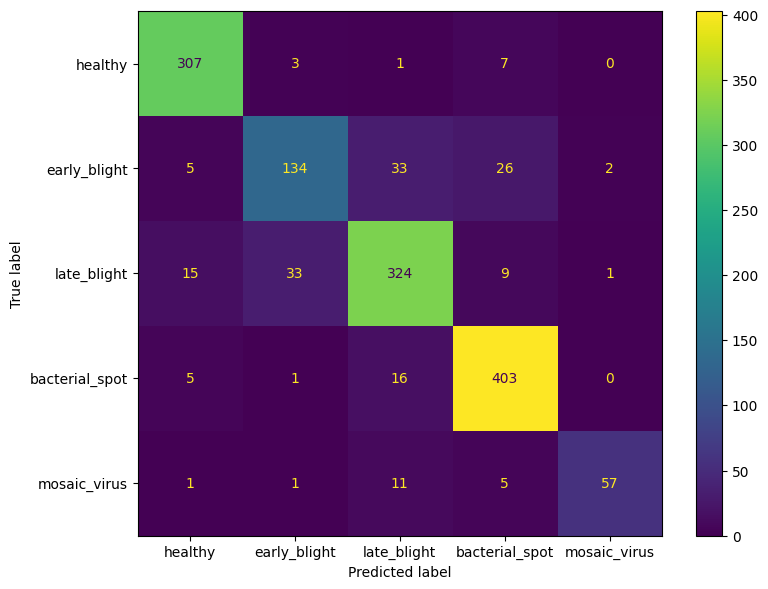

In [8]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax)
plt.tight_layout()

## PlantDoc

### Load Dataset

In [9]:
import numpy as np

dataset = np.load("PlantDoc_v2.npz")

X_train = dataset["X_train"]
X_test = dataset["X_test"]
y_train = dataset["y_train"]
y_test = dataset["y_test"]

### Model Training

In [10]:
import xgboost as xgb

In [11]:
model = xgb.XGBClassifier(tree_method="hist", early_stopping_rounds=2)
model.fit(X_train, y_train, eval_set=[(X_test, y_test)])

[0]	validation_0-mlogloss:1.55476
[1]	validation_0-mlogloss:1.53585
[2]	validation_0-mlogloss:1.55803


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=2,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [12]:
y_pred = model.predict(X_test)

### Model Evaluation

In [13]:
print(f"Test Accuracy: {accuracy_score(y_test, y_pred)*100}%")

Test Accuracy: 30.434782608695656%


In [14]:
classes = ["healthy", "early_blight", "late_blight", "bacterial_spot", "mosaic_virus"]
print(classification_report(y_test, y_pred, target_names=classes))

                precision    recall  f1-score   support

       healthy       0.20      0.12      0.15         8
  early_blight       0.40      0.44      0.42         9
   late_blight       0.25      0.30      0.27        10
bacterial_spot       0.31      0.56      0.40         9
  mosaic_virus       0.33      0.10      0.15        10

      accuracy                           0.30        46
     macro avg       0.30      0.31      0.28        46
  weighted avg       0.30      0.30      0.28        46



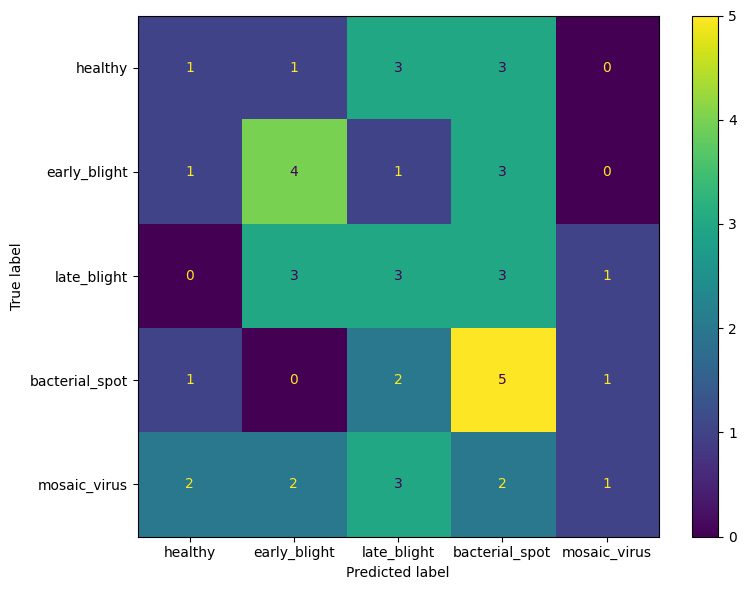

In [15]:
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classes)
fig, ax = plt.subplots(figsize=(8, 6))  
disp.plot(ax=ax)
plt.tight_layout()